# 2014 Vornamen 

#### Pakete installieren

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
%matplotlib inline

CSV einlesen 

In [2]:
g = 'https://www.offenesdatenportal.de/dataset/e5ff322f-a8b7-4dc7-b281-2d3d767983f9/resource/4da3d423-9aeb-4e6e-8dbc-926649089416/download/vornamen14.csv'
df = pd.read_csv(g, sep=';')
df.head(2)

,vorname,anzahl,geschlecht
0,Marie,35,w
1,Alexander,32,m


In [6]:
len(df)

1312

In [7]:
df['jahr'] = 2014 

In [8]:
df.head()

,vorname,anzahl,geschlecht,jahr
0,Marie,35,w,2014
1,Alexander,32,m,2014
2,Sophie,30,w,2014
3,Emilia,27,w,2014
4,Mia,25,w,2014


In [18]:
# Welche Namen wurden 2014 am häufigsten vergeben? 
top = df.sort_values(by='anzahl', ascending=False)
top.head(6)

,vorname,anzahl,geschlecht,jahr
0,Marie,35,w,2014
1,Alexander,32,m,2014
2,Sophie,30,w,2014
3,Emilia,27,w,2014
4,Mia,25,w,2014
5,Elias,23,m,2014


In [16]:
# Top 30 der weiblichen Vornamen
w_top30 = df[(df['geschlecht'] == 'w')].head(30)
w_top30.head(6)

,vorname,anzahl,geschlecht,jahr
0,Marie,35,w,2014
2,Sophie,30,w,2014
3,Emilia,27,w,2014
4,Mia,25,w,2014
9,Emma,22,w,2014
11,Lena,18,w,2014


In [21]:
# Länge des Namens an Position 5 im df
len(df['vorname'][5])

5

In [49]:
# Not working
eingabe_laenge = input('Wie viele Buchstaben soll der Name haben? ')
laenge = int(len(df['vorname']))
laenge
#Meine_laenge = df[len(df['vorname'] == laenge)]
#Meine_laenge

Wie viele Buchstaben soll der Name haben? 5


1312

In [43]:
# Den eigenen Namen suchen 
name = input('Bitte gib deinen Namen ein: ')
Mein_Name = df[(df['vorname'] == name)]
Mein_Name

Bitte gib deinen Namen ein: Lisa


,vorname,anzahl,geschlecht,jahr
279,Lisa,2,w,2014


In [9]:
w_top30['rang'] = w_top30['anzahl'].rank(ascending=False, method='first')
w_top30.head(2)

,vorname,anzahl,geschlecht,jahr,rang
0,Marie,35,w,2014,1
2,Sophie,30,w,2014,2


In [10]:
# Top 30 der männlichen Vornamen
m_top30 = df[(df['geschlecht'] == 'm')].head(30)
m_top30.head(2)

,vorname,anzahl,geschlecht,jahr
1,Alexander,32,m,2014
5,Elias,23,m,2014


In [11]:
m_top30['rang'] = m_top30['anzahl'].rank(ascending=False, method='first')
m_top30.head(2)

,vorname,anzahl,geschlecht,jahr,rang
1,Alexander,32,m,2014,1
5,Elias,23,m,2014,2


In [12]:
# Weiblich und männlich zu einem zusammen setzen
result = pd.merge(w_top30, m_top30, how='outer')

In [13]:
vn_2014_m = result.sort_values(by='anzahl', ascending=False)
vn_2014_m['stadt'] = 'Moers' 
vn_2014_m.head(2)

,vorname,anzahl,geschlecht,jahr,rang,stadt
0,Marie,35,w,2014,1,Moers
30,Alexander,32,m,2014,1,Moers


In [14]:
h = 'Vornamensstatistik_2014_koeln.csv'
koelle = pd.read_csv(h, sep=';')
koelle.head(2)

,vorname,anzahl,geschlecht
0,Marie,316,w
1,Sophie,249,w


In [15]:
koelle['jahr'] = '2014' 

In [16]:
koelle['stadt'] = 'Köln' 

In [17]:
# Top 30 der weiblichen Vornamen
k_w_top30 = koelle[(koelle['geschlecht'] == 'w')].head(30)
k_w_top30.head(2)

,vorname,anzahl,geschlecht,jahr,stadt
0,Marie,316,w,2014,Köln
1,Sophie,249,w,2014,Köln


In [18]:
k_w_top30['rang'] = k_w_top30['anzahl'].rank(ascending=False, method='first')
k_w_top30.head(2)

,vorname,anzahl,geschlecht,jahr,stadt,rang
0,Marie,316,w,2014,Köln,1
1,Sophie,249,w,2014,Köln,2


In [19]:
# Top 30 der männlichen Vornamen
k_m_top30 = koelle[(koelle['geschlecht'] == 'm')].head(30)
k_m_top30.head(2)

,vorname,anzahl,geschlecht,jahr,stadt
3,Maximilian,158,m,2014,Köln
4,Alexander,153,m,2014,Köln


In [20]:
k_m_top30['rang'] = k_m_top30['anzahl'].rank(ascending=False, method='first')
k_m_top30.head(2)

,vorname,anzahl,geschlecht,jahr,stadt,rang
3,Maximilian,158,m,2014,Köln,1
4,Alexander,153,m,2014,Köln,2


In [26]:
# Köln zu einem zusammen setzen
koelle = pd.merge(k_w_top30, k_m_top30, how='outer')
koelle.head(2)

,vorname,anzahl,geschlecht,jahr,stadt,rang
0,Marie,316,w,2014,Köln,1
1,Sophie,249,w,2014,Köln,2


In [27]:
koelle = koelle.sort_values(by='anzahl', ascending=False)
koelle.head(2)

,vorname,anzahl,geschlecht,jahr,stadt,rang
0,Marie,316,w,2014,Köln,1
1,Sophie,249,w,2014,Köln,2


In [79]:
# Köln und Moers zusammen setzen
staedte = pd.merge(koelle, vn_2014_m, how='outer')
staedte.head()

,vorname,anzahl,geschlecht,jahr,stadt,rang
0,Marie,316,w,2014,Köln,1
1,Sophie,249,w,2014,Köln,2
2,Maria,179,w,2014,Köln,3
3,Maximilian,158,m,2014,Köln,1
4,Alexander,153,m,2014,Köln,2


In [71]:
summe_moers = df['anzahl'].sum()
summe_moers

2660

In [72]:
summe_koeln = koelle['anzahl'].sum()
summe_koeln

5142.0

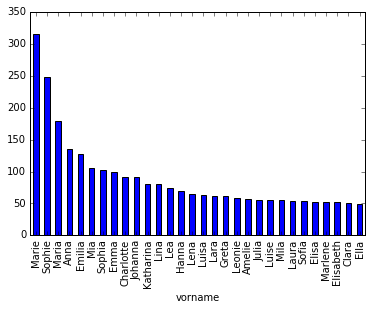

In [73]:
my_plot = k_w_top30['anzahl'].plot(kind='bar')

In [74]:
k_w_top30.index = k_w_top30['vorname']

In [75]:
k_w_top30

,vorname,anzahl,geschlecht,jahr,stadt,rang
vorname,,,,,,
Marie,Marie,316,w,2014,Köln,1
Sophie,Sophie,249,w,2014,Köln,2
Maria,Maria,179,w,2014,Köln,3
Anna,Anna,135,w,2014,Köln,4
Emilia,Emilia,128,w,2014,Köln,5
Mia,Mia,106,w,2014,Köln,6
Sophia,Sophia,102,w,2014,Köln,7
Emma,Emma,99,w,2014,Köln,8
Charlotte,Charlotte,92,w,2014,Köln,9


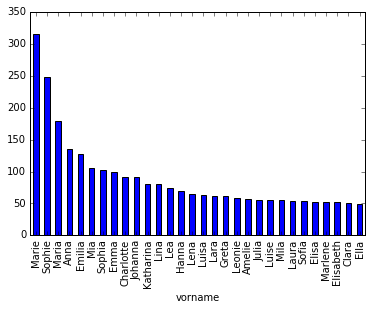

In [76]:
my_plot = k_w_top30['anzahl'].plot(kind='bar')

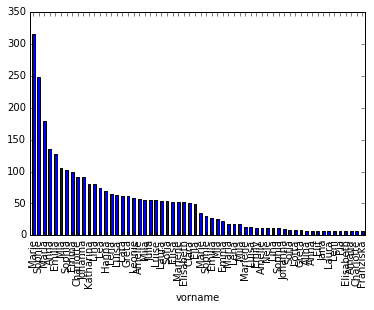

In [77]:
plot = staedte[staedte['geschlecht'] == 'w']

plot.index = plot['vorname']
my_plot = plot['anzahl'].plot(kind='bar')

In [85]:
plot1 = staedte[staedte['geschlecht'] == 'w'].head(30)
plot1.index = plot1['vorname']
plot1



,vorname,anzahl,geschlecht,jahr,stadt,rang
vorname,,,,,,
Marie,Marie,316,w,2014,Köln,1
Sophie,Sophie,249,w,2014,Köln,2
Maria,Maria,179,w,2014,Köln,3
Anna,Anna,135,w,2014,Köln,4
Emilia,Emilia,128,w,2014,Köln,5
Mia,Mia,106,w,2014,Köln,6
Sophia,Sophia,102,w,2014,Köln,7
Emma,Emma,99,w,2014,Köln,8
Charlotte,Charlotte,92,w,2014,Köln,9


In [90]:
my_plot1 = plot1['anzahl']
my_plot1

vorname
Marie        316
Sophie       249
Maria        179
Anna         135
Emilia       128
Mia          106
Sophia       102
Emma          99
Charlotte     92
Johanna       91
Katharina     80
Lina          80
Lea           74
Hanna         70
Lena          64
Luisa         63
Lara          62
Greta         61
Leonie        59
Amelie        57
Mila          55
Julia         55
Luise         55
Laura         54
Sofia         54
Elisa         53
Marlene       53
Elisabeth     52
Clara         50
Ella          49
Name: anzahl, dtype: float64

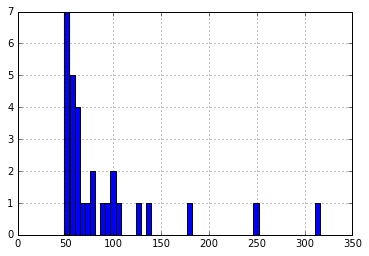

In [91]:
my_plot1 = plot1['anzahl'].hist(bins=50)